General idea: for insertion positions found in several populations, try and determine how many of those are significant (i.e. the position is really specifically targeted). To do this, for each population, we randomly shuffle insertion positions (using all possible positions at the scale of the whole experiment) and then plot a histogram displaying how many insertion positions are found in 1, 2, 3 etc different populations to compare it to the histogram obtained whithout shuffling the insertions. 

In [1]:
ref = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/ref/"
data = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/LTEE-clone-curated/"
storage = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/GenomeDiagram_tests/"

In [2]:
from os import listdir
from os.path import isfile, join
import random

In [3]:
onlyfiles = [f for f in listdir(data) if isfile(join(data, f))] #listing all file names for the .gd files
files = [] # creating a list that will first contain these names to be called, and later on open .gd files
file_names = [] # list that will contain names as strings (kept as such for all the analysis)
readlines_names = [] #list that will contain lists with the lines of each file (obtained via readlines())
for i in onlyfiles: #fixing an error in the list of files (I don't know why it occurs) and filling the previously defined lists
    if len(i) < 30:
        files.append(i)
        file_names.append(i)
        readlines_names.append(i)

In [4]:
IS_name = 'IS150'

In [5]:
for i in range(len(files)):
    files[i] = open(data+files[i],"r") #the list files becomes a list of open files
    readlines_names[i] = files[i].readlines() # the list readlines_names becomes a list of lists, with each list containing 
    #all the lines from one file

insertion_lines = {} # Creating a dictionary to hold all the insertions found in each file
for file_name in file_names: # Creating one entry per file in the dictionary (an empty list)
    insertion_lines[file_name] = []
for i in range(len(file_names)): # for each file
    for line in readlines_names[i]: #we look at all the lines
        line = line.split()
        if 'MOB' in line: #if one line corresponds to a mutation linked to a mobile element
            insertion_lines[file_names[i]].append(line) #we add that line to the entry of that file in the dictionary                    

IS_lines={name:[line for line in insertion_lines[name] if line[5] == IS_name] for name in file_names}

In [6]:
pop_names = ["Ara+1", "Ara+2", "Ara+3", "Ara+4", "Ara+5", "Ara+6","Ara-1", "Ara-2", "Ara-3", "Ara-4", "Ara-5", "Ara-6"]

In [7]:
list_all_possible_pos = []
list_insertions_by_pop = {}
for pop in pop_names:
    list_insertions_by_pop[pop] = []
    for i in range(len(file_names)):
        if pop in file_names[i]:
                for IS_line in IS_lines[file_names[i]]: #for each insertion in the dictionary we generated
                    IS_position = int(IS_line[4])
                    list_all_possible_pos.append(IS_position)
                    list_insertions_by_pop[pop].append(IS_position)
    list_insertions_by_pop[pop] = list(set(list_insertions_by_pop[pop]))
list_all_possible_pos = list(set(list_all_possible_pos))

In [8]:
number_of_ins = []
for position in list_all_possible_pos:
    number_of_occurrences = 0
    for pop in list_insertions_by_pop.keys():
        for pop_insertion in list_insertions_by_pop[pop]:
            if position == pop_insertion:
                number_of_occurrences += 1
    number_of_ins.append(number_of_occurrences)   
    if number_of_occurrences > 4:
        print('number of occurrences: ', number_of_occurrences)
        print('position: ', position)

number of occurrences:  6
position:  16972
number of occurrences:  5
position:  3015771
number of occurrences:  7
position:  1270660


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

Text(0.5, 0, 'Number of independent occurrences')

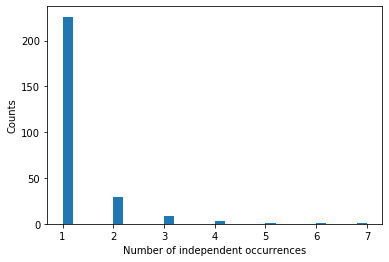

In [10]:
plt.hist(number_of_ins, density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Number of independent occurrences')

In [11]:
def count_dictionary(dictionary, value):
    count = 0
    for key in dictionary.keys():
        for item in dictionary[key]:
            if item == value:
                count += 1
    return count

In [12]:
list_all_possible_pos.sort()

Trimming the list of possible positions to merge close positions: we keep the max when positions are close.

In [13]:
list_fusions = []
for position_1 in list_all_possible_pos:
    for position_2 in list_all_possible_pos:
        if position_1 != position_2:
            if max(position_1, position_2) - min(position_1, position_2) <= 1000:
                if min(position_1, position_2) in list_all_possible_pos:
                    list_all_possible_pos.remove(min(position_1, position_2))
                fusion_found = False
                for fusion in list_fusions:
                    if position_1 in fusion or position_2 in fusion:
                        #print('added ', max(position_1, position_2), ' to ', fusion)
                        fusion.append(max(position_1, position_2))
                        fusion_found = True
                        break
                if not fusion_found:
                    list_fusions.append([min(position_1, position_2), max(position_1, position_2)])
                    #print('created fusion list ', min(position_1, position_2), max(position_1, position_2))

In [14]:
for pop in list_insertions_by_pop.keys():
    for pop_insertion in [i for i in list_insertions_by_pop[pop]]:
        for fusion in list_fusions:
            if pop_insertion in fusion and pop_insertion != fusion[-1]:
                #print('insertion position ', pop_insertion, ' found in ', fusion)
                list_insertions_by_pop[pop].remove(pop_insertion)
                list_insertions_by_pop[pop].append(fusion[-1])
                #print('added ', fusion[-1])
                break

In [15]:
number_of_ins = []
for position in list_all_possible_pos:
    number_of_occurrences = 0
    pop_with_ins = []
    for pop in list_insertions_by_pop.keys():
        for pop_insertion in list_insertions_by_pop[pop]:
            if position == pop_insertion and pop not in pop_with_ins:
                number_of_occurrences += 1
                pop_with_ins.append(pop)
    number_of_ins.append(number_of_occurrences)   
    if number_of_occurrences > 4:
        print('number of occurrences: ', number_of_occurrences)
        print('position: ', position)

number of occurrences:  8
position:  16990
number of occurrences:  6
position:  241692
number of occurrences:  9
position:  1270660
number of occurrences:  7
position:  1462320
number of occurrences:  5
position:  2877356
number of occurrences:  5
position:  2899617
number of occurrences:  7
position:  3015772


In [16]:
list_insertions_by_pop_shuffle = list_insertions_by_pop

In [17]:
all_simulations = []
for i in range(100):
    for pop in list_insertions_by_pop_shuffle.keys():
        for position in list_insertions_by_pop_shuffle[pop]:
            new_pos = random.choice(list_all_possible_pos)
            if count_dictionary(list_insertions_by_pop_shuffle, position) > 1:
                list_insertions_by_pop_shuffle[pop].remove(position)
                list_insertions_by_pop_shuffle[pop].append(new_pos)
    number_of_ins_simulation = []
    for position in list_all_possible_pos:
        number_of_occurrences = 0
        pop_with_ins = []
        for pop in list_insertions_by_pop_shuffle.keys():
            for pop_insertion in list_insertions_by_pop_shuffle[pop]:
                if position == pop_insertion and pop not in pop_with_ins:
                    number_of_occurrences += 1
                    pop_with_ins.append(pop)
        number_of_ins_simulation.append(number_of_occurrences)   
    for n in number_of_ins_simulation:
        all_simulations.append(n)

simulation = []
for i in range(1,11):
    n = all_simulations.count(i)
    mean_occurrences = round(n/100)
    for j in range(mean_occurrences):
        simulation.append(i)

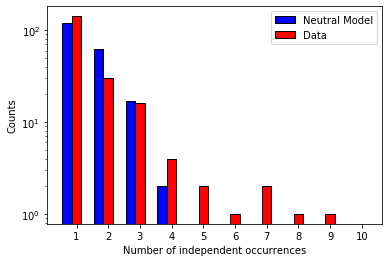

In [18]:
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [simulation.count(i) for i in range(1,11)]
 
# Choose the height of the cyan bars
bars2 = [number_of_ins.count(i) for i in range(1,11)]
 
# The x position of bars
r1 = [i for i in range(1,11)]
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', label='Neutral Model')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'red', edgecolor = 'black', label='Data')
 
# general layout
plt.xticks([r + barWidth for r in r1], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.ylabel('Counts')
plt.xlabel('Number of independent occurrences')
plt.yscale('log')
plt.legend()
 
#plt.savefig('significance_targeted_positions_merged_1000pb_IS150.png', dpi = 300)